In [1]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [2]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [3]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [6]:
mdl04=mdl[mdl['Server Name']=='CALBIPRD04']

<B>CALPBPRD04 CPU %<B>

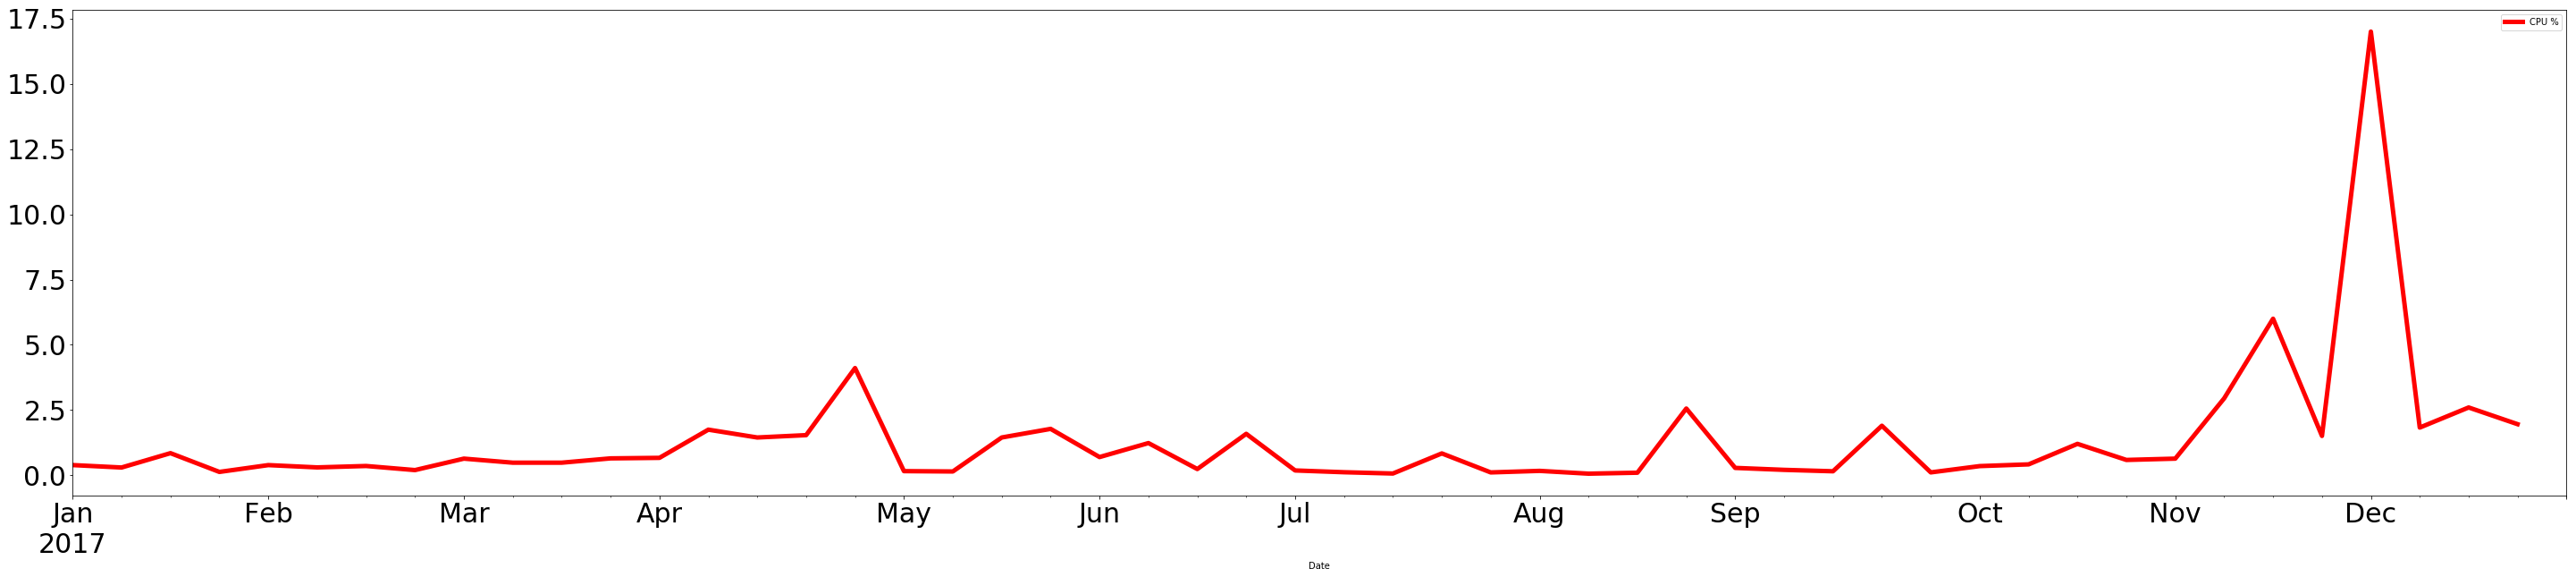

In [7]:
mdl04.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='CPU %', color ='red')

In [9]:
mdl04.set_index('Date', inplace=True)
mdl04['Month']= mdl04.index.month
mdl04['Day']=mdl04.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
mdl04.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD04,Wk 1,0.393,6.2,1,7
2017-01-14,CALBIPRD04,Wk 2,0.300,5.3,1,14
2017-01-21,CALBIPRD04,Wk 3,0.850,5.8,1,21
2017-01-28,CALBIPRD04,Wk 4,0.131,5.3,1,28
2017-02-04,CALBIPRD04,Wk 5,0.392,5.2,2,4


<B>CALBIPRD04 CPU% (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


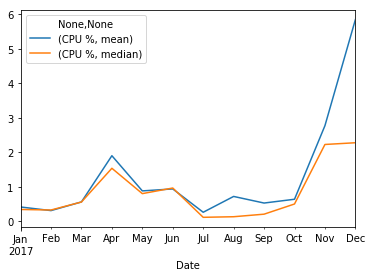

In [11]:
mdl04[['CPU %']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [13]:
print 'CALBIPRD04 CPU % Week Corr', mdl04['CPU %'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD04 CPU % Month Corr', mdl04['CPU %'].resample('M').mean().autocorr(lag=1)

 CALBIPRD04 CPU % Week Corr 0.114391084178
CALBIPRD04 CPU % Month Corr 0.722036189605


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [14]:
print 'diff(1) lag =1 :', mdl04['CPU %'].dropna().diff(1).dropna().autocorr(lag=1)
print 'lag =1 :', mdl04['CPU %'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl04['CPU %'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl04['CPU %'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl04['CPU %'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl04['CPU %'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl04['CPU %'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl04['CPU %'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl04['CPU %'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl04['CPU %'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl04['CPU %'].dropna().autocorr(lag=34)

diff(1) lag =1 : -0.624762848427
lag =1 : 0.114391084178
lag =2 : 0.332668887398
lag =3 : 0.165699645206
lag =4 : 0.119169763529
lag =5 : 0.00915921494906
lag =6 : 0.0484084791623
lag =7 : -0.107296686963
lag =12 : -0.050214517134
lag =24 : -0.117277860532
lag =24 : 0.291370981139


<b> CALBIPRD04 CPU % Autocorrlation - Month Lag 1 to 11</b>

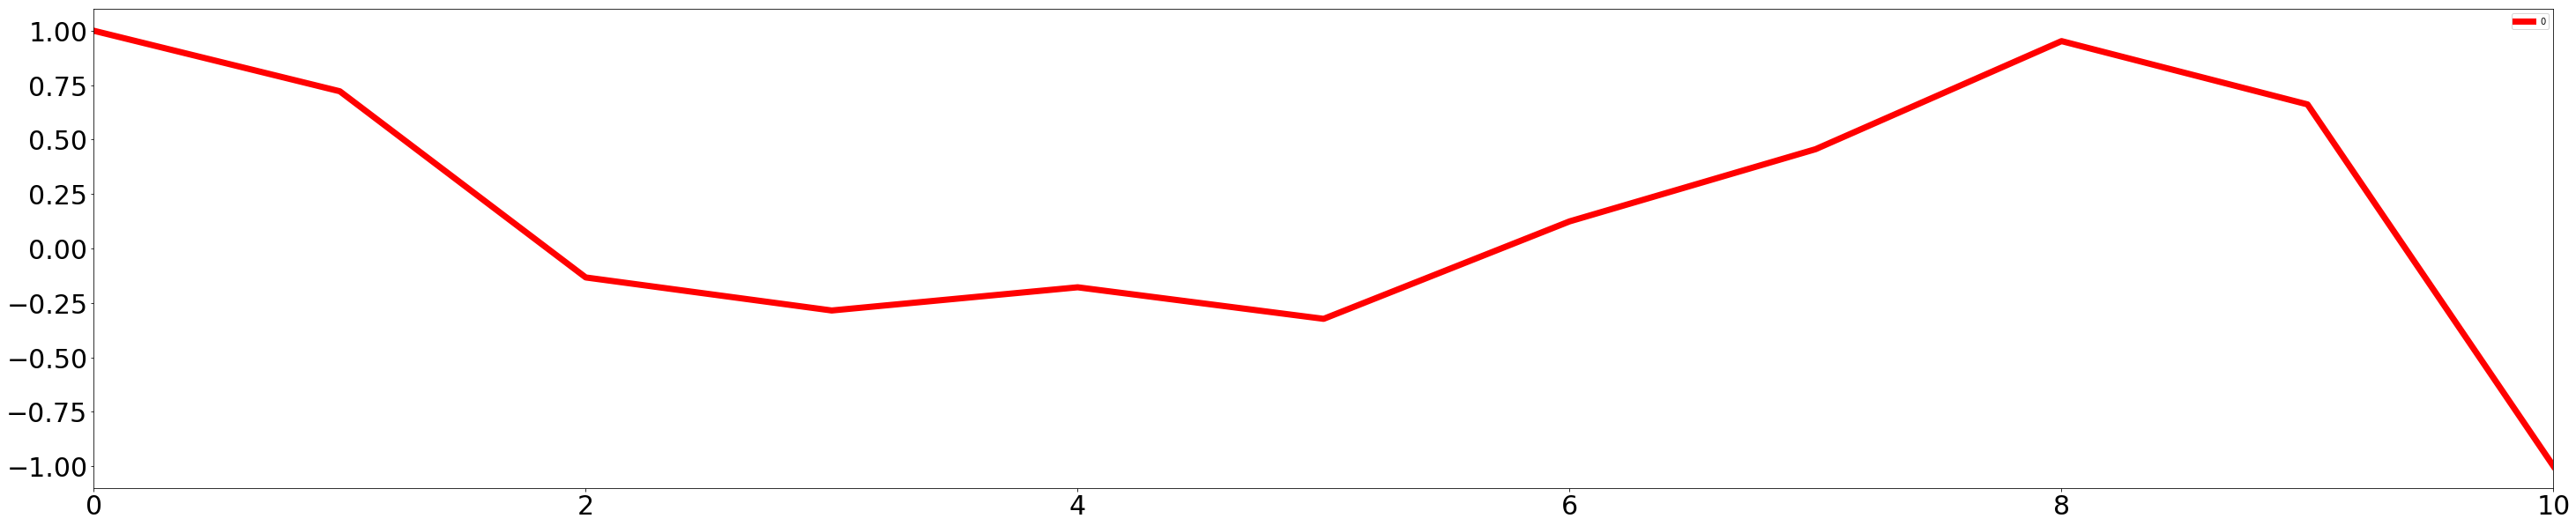

In [15]:
autoc = []

for i in range(11):
    autoc.append(mdl04['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

<b> CALBIPRD04 CPU % Autocorrlation - Week Lag 1 to 51</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


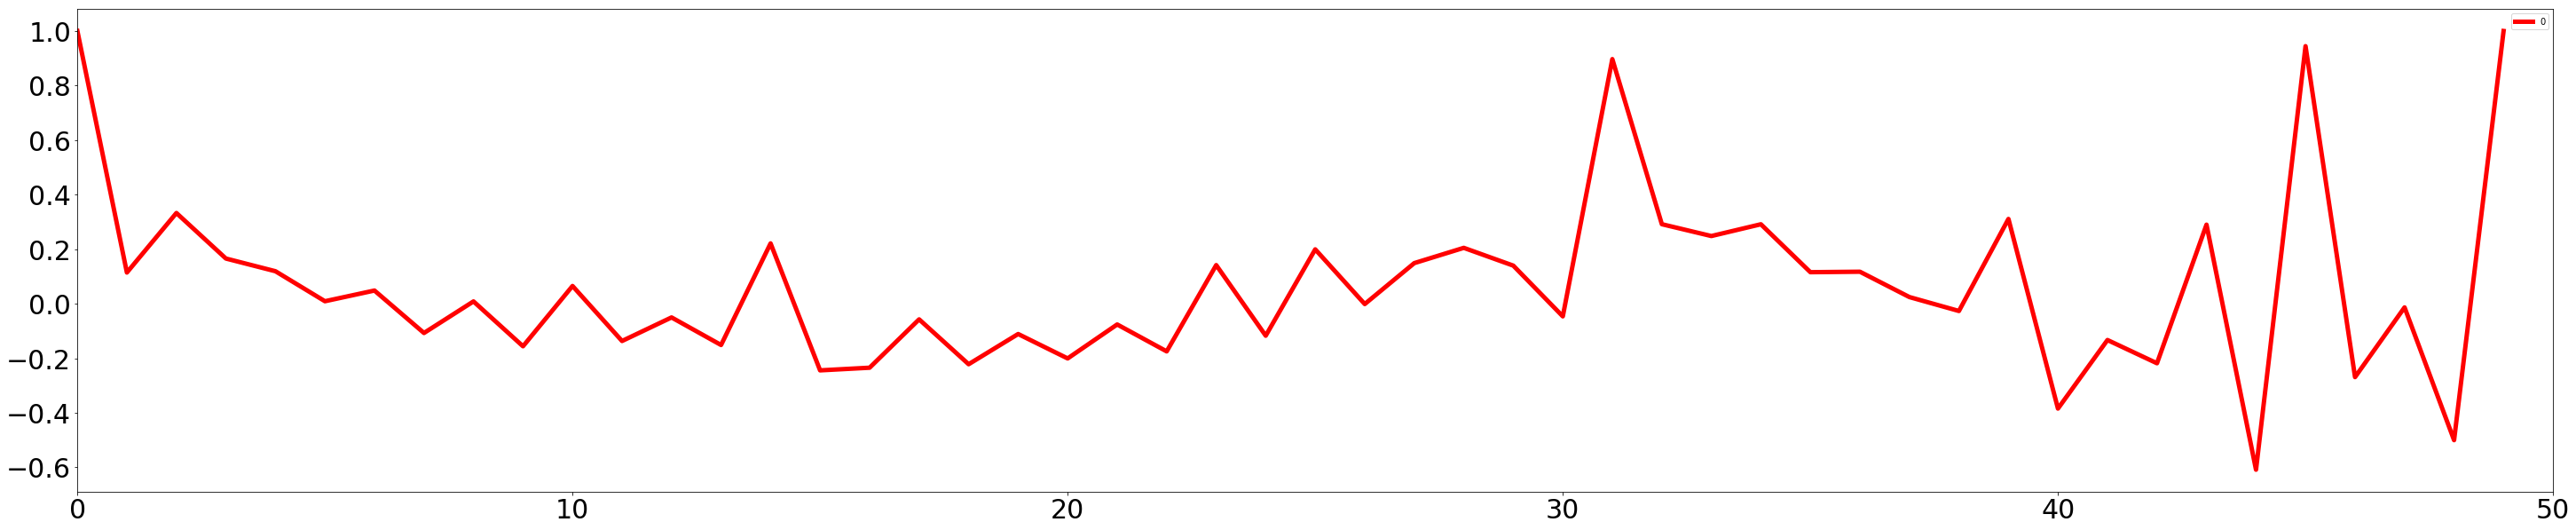

In [47]:
autoc = []

for i in range(51):
    autoc.append(mdl04['CPU %'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


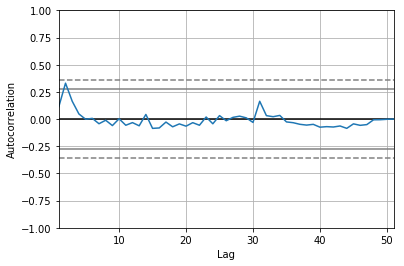

In [16]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl04['CPU %'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

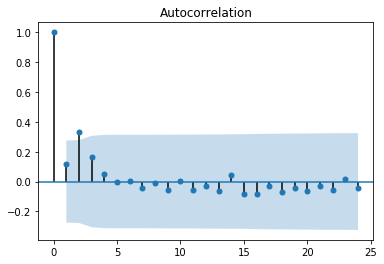

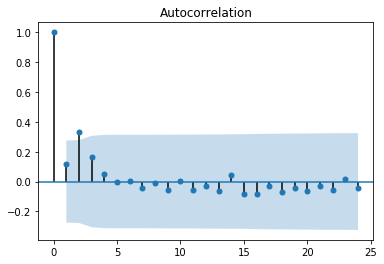

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdl04['CPU %'].dropna().diff(1).dropna(),lags=24) 
plot_acf(mdl04['CPU %'].dropna(),lags=24) 

<b> Trend and Seasonality falls within confident intervel, so no need of calculating 'diff' </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation ~ .332  for lag 2 and not falls witin intervel, NEED to use diff(1) </font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

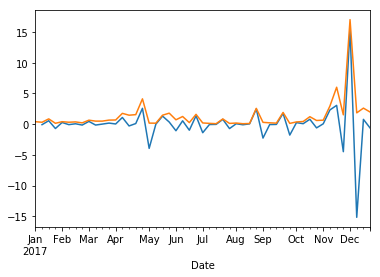

In [27]:
#mdl01['RAM'].dropna().plot()
mdl04['CPU %'].dropna().diff(1).dropna().plot()
mdl04['CPU %'].dropna().plot()

In [34]:
from statsmodels.tsa.arima_model import ARMA
#mdl04a = mdl04[['CPU %']].dropna().diff(1).dropna().astype(float)
mdl04a = mdl04[['CPU %']].dropna().astype(float)
modela = ARMA(mdl04a, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -118.528
Method:                       css-mle   S.D. of innovations              2.472
Date:                Sat, 06 Jan 2018   AIC                            243.057
Time:                        17:42:15   BIC                            248.852
Sample:                    01-07-2017   HQIC                           245.271
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2928      0.389      3.323      0.002       0.530       2.055
ar.L1.CPU %     0.1124      0.138      0.814      0.419      -0.158       0.383
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.8995           +0.0000j            8.8995            0.0000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'CPU %' coef is 0.1124 which is low, so no need to use 'diff' to maeke it stationary and P value is >.05 which is not significant.</br>
<br> 1. When diff =0 AR coef is .1124 and autocorrelation at lag 1 is 0.11439 and P 0.419 <.05</br> 
<br>2. When diff =1 AR coef is -.6130 and autocorrelation at lag 1 with diff(1) is -0.624762848427 and P 0.00 <.05 </br>

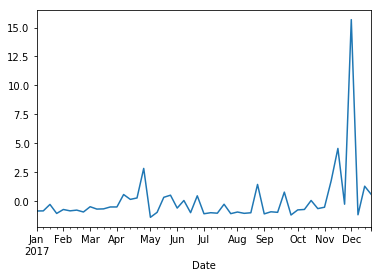

In [35]:
modela.resid.plot()

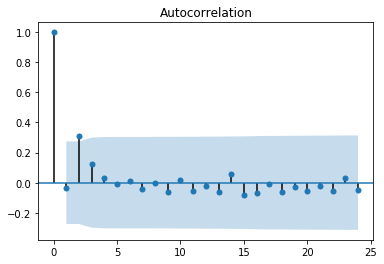

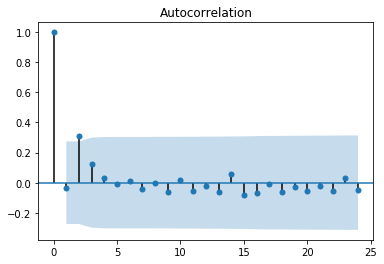

In [36]:
plot_acf(modela.resid, lags=24)

In [49]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [37]:
#mdl04m = mdl04[['CPU %']].dropna().diff(1).dropna().astype(float)
mdl04m = mdl04[['CPU %']].dropna().astype(float)
modelm = ARMA(mdl04m, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                -118.655
Method:                       css-mle   S.D. of innovations              2.478
Date:                Sat, 06 Jan 2018   AIC                            243.310
Time:                        17:43:21   BIC                            249.106
Sample:                    01-07-2017   HQIC                           245.525
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2930      0.371      3.487      0.001       0.566       2.020
ma.L1.CPU %     0.0698      0.110      0.635      0.528      -0.146       0.285
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -14.3328           +0.0000j           14.3328            0.5000
-----------------------------------------------------------------------------
"""

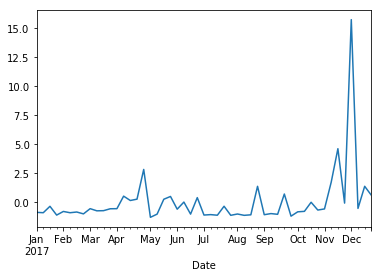

In [38]:
modelm.resid.plot()

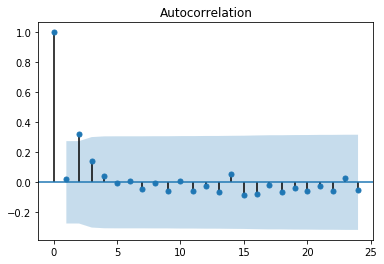

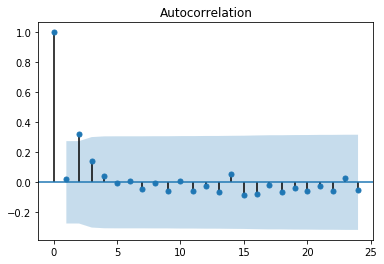

In [39]:
plot_acf(modelm.resid, lags=24)

<b>ARIMA</b>

In [40]:
from statsmodels.tsa.arima_model import ARIMA
mdl04 = mdl04[['CPU %']].dropna().astype(float)
model = ARIMA(mdl04, (1, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -118.528
Method:                       css-mle   S.D. of innovations              2.472
Date:                Sat, 06 Jan 2018   AIC                            243.057
Time:                        17:44:01   BIC                            248.852
Sample:                    01-07-2017   HQIC                           245.271
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2928      0.389      3.323      0.002       0.530       2.055
ar.L1.CPU %     0.1124      0.138      0.814      0.419      -0.158       0.383
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.8995           +0.0000j            8.8995            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
#mdl03['CPU %'].dropna().diff(1).dropna().autocorr(1)
mdl04['CPU %'].dropna().autocorr(1)

0.11439108417781621

<b>Note:</b>
<br>From ARIMA (1,0,0) coef is 0.1124 and P value is > .05 which is  not significant </br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


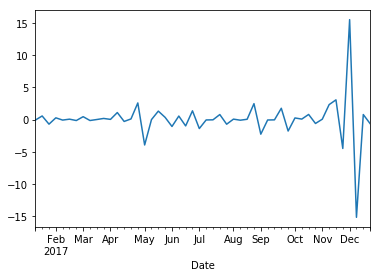

In [42]:
#model.resid.plot()
mdl04['CPU %'].dropna().diff(1).dropna().plot()

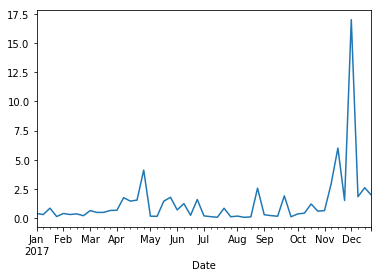

In [43]:
mdl04['CPU %'].dropna().plot()

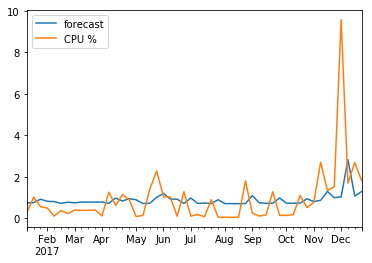

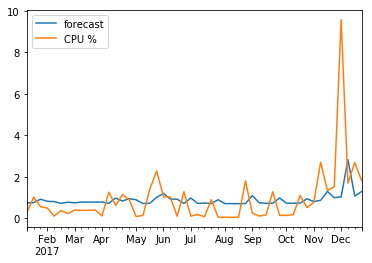

In [62]:
model.plot_predict(1, 50)

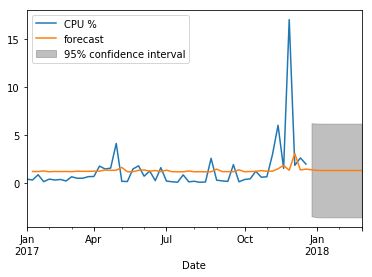

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl04['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Ask 1 .why whehn difff(1) gives more inclient graph but not for AR(1) or ARIMA(1,0,0)
<br>2. When to use ARIMA(1,1,1) or ARIMA(0,1,1)</br>
<br>in graph whats the differece between 126 and 127</br></b>